In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/Maxim/Downloads/fall-detection-data-from-china/falldeteciton.csv')

FileNotFoundError: [Errno 2] File b'C:/Users/Maxim/Downloads/fall-detection-data-from-china/falldeteciton.csv' does not exist: b'C:/Users/Maxim/Downloads/fall-detection-data-from-china/falldeteciton.csv'

In [165]:
pd.set_option('precision', 2)
print(data.describe())



       ACTIVITY      TIME        SL       EEG        BP        HR  CIRCLUATION
count  16382.00  16382.00  1.64e+04  1.64e+04  16382.00  16382.00     16382.00
mean       2.36  10936.84  7.53e+04 -5.62e+03     58.25    211.54      2894.34
std        1.74   5261.46  1.28e+05  1.08e+05     48.29    129.95      3825.93
min        0.00   1954.23  4.22e+01 -1.26e+07      0.00     33.00         5.00
25%        0.00   7263.69  9.94e+03 -5.63e+03     25.00    119.00       587.00
50%        3.00   9769.35  3.12e+04 -3.36e+03     44.00    180.00      1581.00
75%        4.00  13481.65  8.08e+04 -2.15e+03     78.00    271.00      3539.00
max        5.00  50895.50  2.43e+06  1.41e+06    533.00    986.00     52210.00


2787.99

In [4]:
correlations = data.corr(method='pearson')
skew = data.skew()

In [5]:
print(correlations)
print(skew)

             ACTIVITY  TIME    SL   EEG    BP    HR  CIRCLUATION
ACTIVITY         1.00 -0.11 -0.15  0.03 -0.12 -0.14        -0.13
TIME            -0.11  1.00  0.84 -0.05  0.44  0.97         0.88
SL              -0.15  0.84  1.00 -0.05  0.40  0.86         0.98
EEG              0.03 -0.05 -0.05  1.00 -0.05 -0.05        -0.05
BP              -0.12  0.44  0.40 -0.05  1.00  0.47         0.42
HR              -0.14  0.97  0.86 -0.05  0.47  1.00         0.90
CIRCLUATION     -0.13  0.88  0.98 -0.05  0.42  0.90         1.00
ACTIVITY        -0.17
TIME             1.20
SL               4.71
EEG           -100.83
BP               2.36
HR               1.33
CIRCLUATION      3.11
dtype: float64


In [127]:
from sklearn import preprocessing
from numpy import set_printoptions

array = data.values

In [ ]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_rescaled = data_scaler.fit_transform(array)

In [8]:
data_rescaled

NameError: name 'data_rescaled' is not defined

In [7]:
set_printoptions(precision=2)

In [9]:
from sklearn.preprocessing import Normalizer

In [ ]:
Data_normalizer = Normalizer(norm='l1').fit(array)
Data_normalized = Data_normalizer.transform(array)

In [10]:
import numpy as np

In [ ]:
input_labels = ['activity', 'time', 'sugar','eeg','blood','heart','circulation']

In [11]:
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)

NameError: name 'input_labels' is not defined

In [ ]:
test_labels = ['eeg','time','eeg']
encoded_values = encoder.transform(test_labels)
encoded_values

In [12]:
#Univariate selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [128]:
X = np.concatenate([array[:,1:3], array[:,4:7]], axis=1)
Y = array[:,0]

In [ ]:
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

In [ ]:
set_printoptions(precision=2)
print(fit.scores_)
fit.transform(X)

In [ ]:
#RFE feature selection


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)

fit = rfe.fit(X, Y)



In [ ]:
#Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)

print(fit.explained_variance_ratio_)
print(fit.components_)

In [ ]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances)

In [47]:
#Classification
#load new database
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()

label_names = bc_data['target_names']
labels = bc_data['target']
feature_names = bc_data['feature_names']
features = bc_data['data']

print(label_names)
print(labels)
print(feature_names)
print(features)

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [14]:
#Organising my data
#also binarizer is here

from sklearn.preprocessing import Binarizer


In [76]:
X = features
Y = labels

test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)

X_new = fit.transform(X)

feature_names[test.get_support(indices=True)]

NameError: name 'SelectKBest' is not defined

In [15]:
#Getting test data
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.4, random_state=42)

In [16]:
#Model evaluation
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

model = gnb.fit(train, train_labels)

preds = gnb.predict(test)

print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [17]:
#find accuracy of above
from sklearn.metrics import accuracy_score

print(accuracy_score(preds, test_labels))

0.9517543859649122


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, preds)

array([[ 73,   7],
       [  4, 144]], dtype=int64)

In [135]:
#other test
label_names = ['standing','walking','sitting','falling','cramps','running']
labels = list(Y)
feature_names = list(data.columns[1:3]) + list(data.columns[4:7])
features = list(X)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=1)

model = gnb.fit(train, train_labels)

preds = gnb.predict(test)

print(accuracy_score(preds, test_labels))
print(confusion_matrix(test_labels, preds))

NameError: name 'gnb' is not defined

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

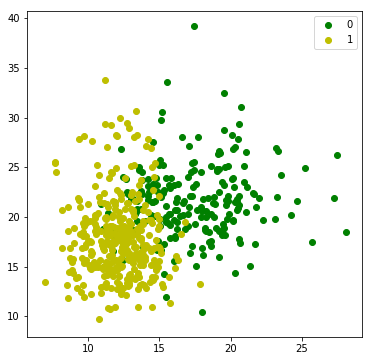

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color='g', label='0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color='y', label='1')
plt.legend()

In [52]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr=lr
        self.num_iter=num_iter
        self.fit_intercept=fit_intercept
        self.verbose=verbose
        
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-h) * np.log(1-h)).mean()
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-Y)) / Y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, Y)
            
            if(self.verbose == True and i%100000==0):
                print(f'loss: {loss} \t')
                
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [54]:
X=X[:,:2]
model = LogisticRegression(lr = 0.1, num_iter=300000)
preds = model.predict(X)
(preds == Y).mean()

plt.figure(figsize = (10, 6))
plt.scatter(X[y == 0][:, 0], X[Y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[Y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red');

c:\users\maxim\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
c:\users\maxim\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply


NameError: name 'y' is not defined

<Figure size 720x432 with 0 Axes>

In [66]:
(preds == Y).mean()


0.8576449912126538

In [75]:
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

ValueError: endog must be in the unit interval.

In [87]:
#multiple logistic regresion

import sklearn
from sklearn import datasets, svm
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

#X = digits.data
#y = digits.target
X = X[:,:2]
y = Y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

digreg = linear_model.LogisticRegression()

digreg.fit(X_train, y_train)

y_pred = digreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [150, 569]

In [88]:
# svm plots
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

h = (x_max/x_min) / 100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_plot = np.c_[xx.ravel(), yy.ravel()]

In [89]:
# value of regularisation

C = 1.0


svc_classifier = svm.SVC(kernel = 'linear', C=1.0).fit(X, y)

Text(0.5, 1.0, 'support vector classifier linear kernel')

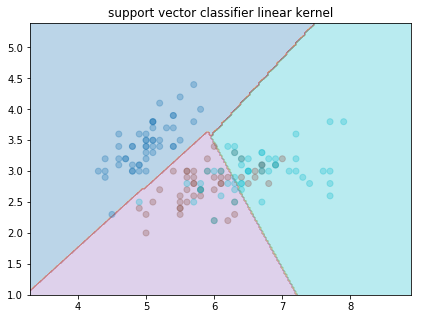

In [109]:
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.tab10, alpha=0.3)
plt.xlim(xx.min(), xx.max())

plt.title("support vector classifier linear kernel")

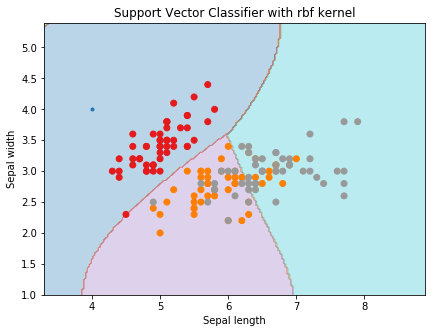

In [123]:
# rbf kernel for svm

svc_classifier = svm.SVC(kernel = 'rbf', gamma = 'auto',C = C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap = plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')


Text(0.5, 1.0, 'Support Vector Classifier with rbf kernel')

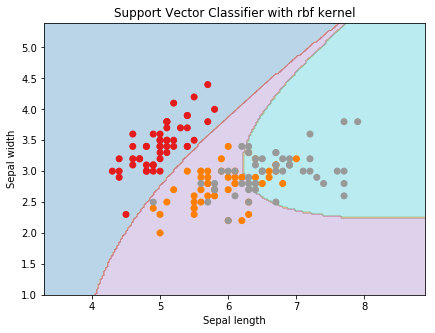

In [120]:
# polynomial svm

svc_classifier = svm.SVC(kernel = 'poly', gamma ='auto', C = C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap = plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [130]:
# decisionn tree regression
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [132]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [133]:
y_pred = clf.predict(X_test)
y_pred

array([0., 4., 2., ..., 0., 4., 3.])

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(result)

result1 = classification_report(y_test, y_pred)
print(result1)

result2 = accuracy_score(y_test, y_pred)
print(result2)

Confusion matrix: 
[[1170    1   18   58   64   45]
 [   1  116   24    0    3    0]
 [   4   29  528  135   43    9]
 [  15    6  134  699  206   36]
 [  20    1   37  196  688  124]
 [  15    2   11   42  130  305]]
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91      1356
         1.0       0.75      0.81      0.78       144
         2.0       0.70      0.71      0.70       748
         3.0       0.62      0.64      0.63      1096
         4.0       0.61      0.65      0.63      1066
         5.0       0.59      0.60      0.60       505

    accuracy                           0.71      4915
   macro avg       0.70      0.71      0.71      4915
weighted avg       0.72      0.71      0.72      4915

0.7133265513733469


In [137]:
# visualising decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
   special_characters=True,feature_names = feature_names,class_names=label_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Pima_diabetes_Tree.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

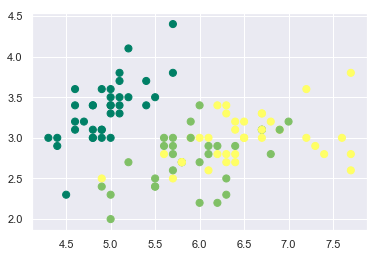

In [142]:
# naive bayes gaussian

import seaborn as sns
sns.set()

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 50, cmap = 'summer');

In [143]:
from sklearn.naive_bayes import GaussianNB
model_GBN = GaussianNB()
model_GBN.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

(4.108383849174056, 8.091616150825944, 1.8621142048540928, 4.5378857951459075)

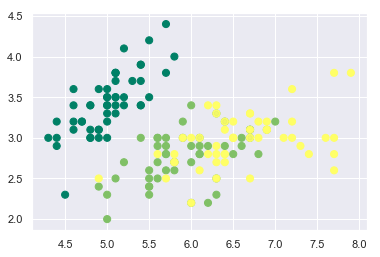

In [150]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')
lim = plt.axis()
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 20, cmap = 'summer', alpha = 0.1)
plt.axis(lim)

In [153]:
y_prob = model_GBN.predict_proba(X_test)
y_prob.round(3)

array([[0.845, 0.053, 0.101],
       [0.289, 0.652, 0.059],
       [0.   , 0.23 , 0.77 ],
       [0.985, 0.007, 0.009],
       [0.   , 0.003, 0.997],
       [0.   , 0.241, 0.759],
       [0.   , 0.107, 0.893],
       [0.995, 0.003, 0.003],
       [0.966, 0.023, 0.011],
       [0.   , 0.091, 0.909],
       [0.044, 0.745, 0.21 ],
       [0.985, 0.007, 0.009],
       [0.   , 0.082, 0.918],
       [0.   , 0.234, 0.766],
       [0.003, 0.537, 0.46 ],
       [0.977, 0.016, 0.007],
       [0.007, 0.786, 0.208],
       [0.129, 0.536, 0.335],
       [0.784, 0.109, 0.108],
       [0.918, 0.053, 0.029],
       [0.061, 0.794, 0.145],
       [0.372, 0.417, 0.211],
       [0.   , 0.193, 0.807],
       [0.98 , 0.011, 0.009],
       [0.   , 0.044, 0.956],
       [0.03 , 0.679, 0.29 ],
       [0.996, 0.002, 0.002],
       [0.995, 0.003, 0.003],
       [0.001, 0.564, 0.435],
       [0.   , 0.704, 0.296],
       [0.002, 0.438, 0.56 ],
       [0.   , 0.015, 0.985],
       [0.022, 0.855, 0.123],
       [0.

In [155]:
# random forest regression

data = iris.data
labels = iris.target
label_names = iris.target_names

X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[19  0  0]
 [ 0 11  1]
 [ 0  2 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.85      0.92      0.88        12
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333


In [173]:
X = np.concatenate((data['SL'], data['HR']), axis = 2)
y = data['BP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

AxisError: axis 2 is out of bounds for array of dimension 1

In [168]:
#linear regression

from sklearn import linear_model

reg_linear = linear_model.LinearRegression()
reg_linear.fit(X_train, y_train)
y_pred = reg_linear.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 73927.6    4319.3   42692.   ... 410843.    96948.4    2246.13].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

15877     73927.60
13894      4319.30
15076     42692.00
13560        56.87
10312      4049.34
15209      1773.48
9248       4701.29
4722       4671.07
1705      30412.00
2762      48902.20
5228      25795.70
13921     11184.60
10927    305686.00
2144       2071.90
14081    306659.00
7252      43842.00
6565      71700.20
3710       4037.72
13867    411897.00
2072     108935.00
16140     13765.00
11951    291235.00
9817      49618.30
5273      79097.00
4726       4132.18
525       26594.00
8183     332920.00
3581       7673.00
8192      28023.90
8053      15570.00
           ...    
2917      17034.30
11805    135275.00
14122    201322.00
14391     84575.00
1369       4250.86
8024      28899.30
14772     26514.50
7210      91781.10
11864     78931.40
14760      6753.42
3425      26613.60
185      158829.00
14285     16808.70
13143      3150.00
11191     13504.40
16064     51195.60
15039    317300.00
5152       3694.63
9394       7332.18
11550      5440.00
12427     25557.10
11807      4

In [174]:
# K means clustering algorithm

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)

<function matplotlib.pyplot.show(*args, **kw)>

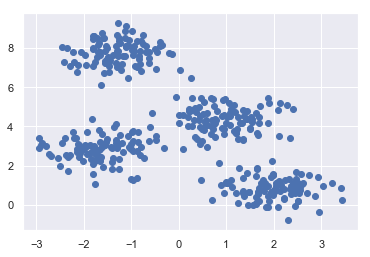

In [176]:
plt.scatter(X[:,0], X[:,1])
plt.show

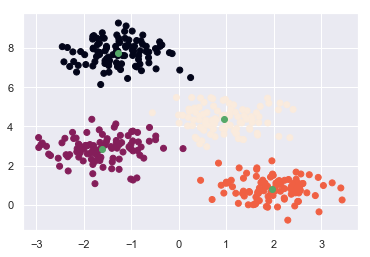

In [180]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=y_kmeans)
plt.scatter(centers[:,0], centers[:,1], c='g')

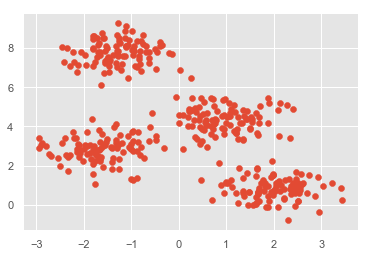

In [182]:
# mean shift cluster algorithm

%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.scatter(X[:, 0], X[:, 1])

[[-0.25770819  3.41992251]
 [-0.68030493  6.72852603]]
2 clusters


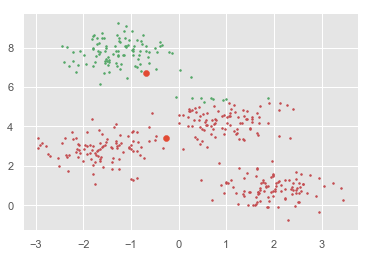

In [188]:
ms = MeanShift()
ms.fit(X)

labels = ms.labels_
centers = ms.cluster_centers_
print(centers)

n_clusters = len(centers)
print(n_clusters , "clusters")

colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=3)
plt.scatter(centers[:, 0], centers[:, 1], zorder=10)

plt.show()

In [ ]:
# hierarchial clustering algorithm